In [2]:
import numpy as np
import matplotlib.pyplot as plt


In [3]:
# Option parameters
S0 = 100        # Initial stock price
K = 100         # Strike price
T = 1.0         # Time to maturity (in years)
r = 0.05        # Risk-free interest rate
sigma = 0.2     # Volatility

# Simulation parameters
n_simulations = 10000   # Number of Monte Carlo paths
n_steps = 100           # Discrete time steps
dt = T / n_steps        # Time delta per step
discount_factor = np.exp(-r * T)


In [4]:
np.random.seed(42)

# Half normal, half antithetic
Z = np.random.standard_normal((n_simulations // 2, n_steps))
Z_antithetic = -Z

# Combine normal + antithetic
Z_full = np.vstack((Z, Z_antithetic))

# Initialize paths
S_paths = np.zeros((n_simulations, n_steps + 1))
S_paths[:, 0] = S0

# Simulate GBM paths
for t in range(1, n_steps + 1):
    S_paths[:, t] = S_paths[:, t - 1] * np.exp(
        (r - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * Z_full[:, t - 1]
    )

# Average price over path (excluding S0)
S_avg = S_paths[:, 1:].mean(axis=1)

# Asian call and put payoffs
call_payoffs = np.maximum(S_avg - K, 0)
put_payoffs = np.maximum(K - S_avg, 0)

# Discounted prices
asian_call_price = discount_factor * np.mean(call_payoffs)
asian_put_price = discount_factor * np.mean(put_payoffs)

print(f"Asian Call Option Price: {asian_call_price:.4f}")
print(f"Asian Put Option Price: {asian_put_price:.4f}")


Asian Call Option Price: 5.9384
Asian Put Option Price: 3.4552


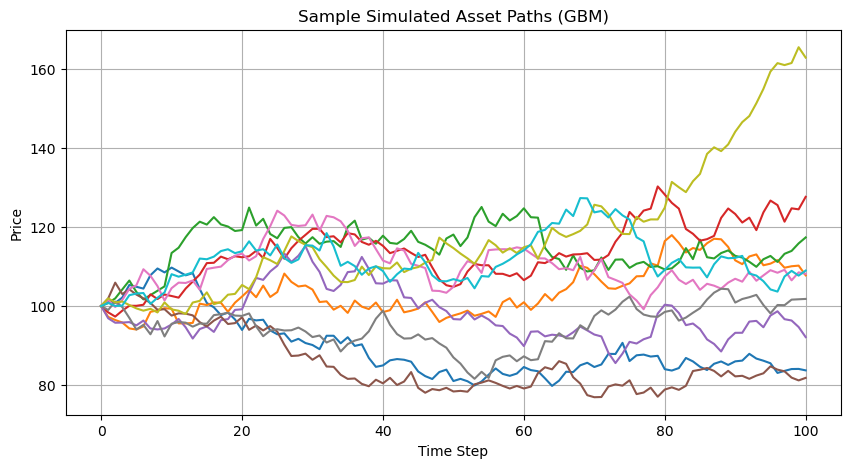

In [5]:
plt.figure(figsize=(10, 5))
plt.plot(S_paths[:10].T)
plt.title("Sample Simulated Asset Paths (GBM)")
plt.xlabel("Time Step")
plt.ylabel("Price")
plt.grid(True)
plt.show()


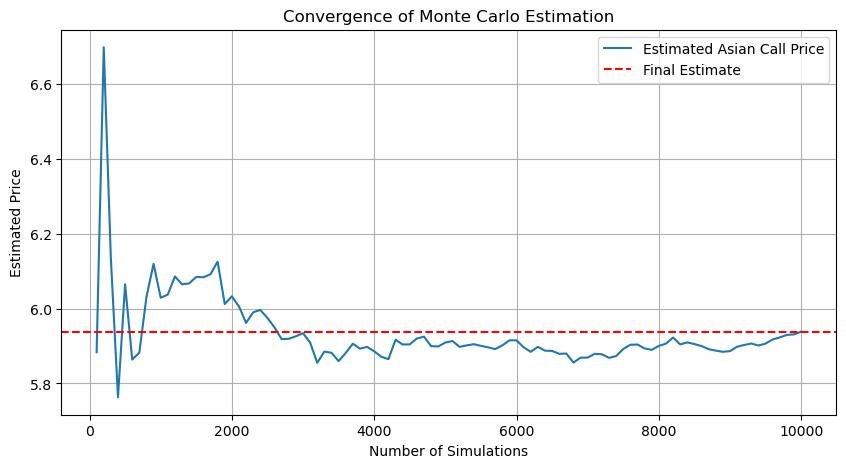

In [6]:
convergence = []
sample_sizes = np.arange(100, n_simulations + 1, 100)

for size in sample_sizes:
    avg_payoff = np.mean(call_payoffs[:size])
    convergence.append(discount_factor * avg_payoff)

plt.figure(figsize=(10, 5))
plt.plot(sample_sizes, convergence, label="Estimated Asian Call Price")
plt.axhline(y=asian_call_price, color='r', linestyle='--', label="Final Estimate")
plt.title("Convergence of Monte Carlo Estimation")
plt.xlabel("Number of Simulations")
plt.ylabel("Estimated Price")
plt.legend()
plt.grid(True)
plt.show()


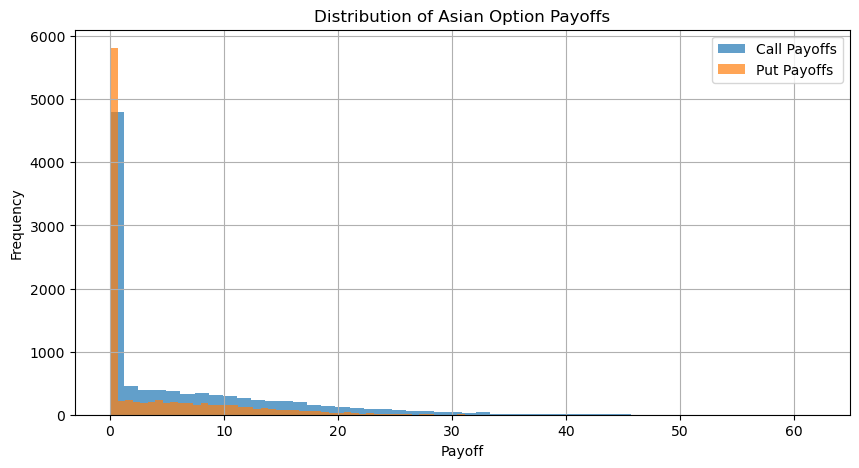

In [7]:
plt.figure(figsize=(10, 5))
plt.hist(call_payoffs, bins=50, alpha=0.7, label='Call Payoffs')
plt.hist(put_payoffs, bins=50, alpha=0.7, label='Put Payoffs')
plt.title("Distribution of Asian Option Payoffs")
plt.xlabel("Payoff")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()
